# Assignment 1
We choose the dataset [Aribnb Dataset](https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata) 

Information on all [attributes](https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit#gid=1967362979 ) in the dataset

## Exercise 0
- (a)  What is the information you can obtain from the dataset / data sets? 
- (b)  What are the attributes in the data and what is their meaning? 
- (c)  Write a small parsing function that can read the data position (column, row)  from the file format you selected.  
- (d)  Write another function that outputs the distribution of the attributes, and counts the frequencies of the different values.  
- (e)  Try  to  describe  the  data  set  in  just  a  few  sentences.  How  is  the  data  provided?  Which  kind  of attributes are contained in the data set? How large is the data set in terms of the number of those elements (listings, reviews, vehicles, geographic regions and locations, extra records, and so on)?  
- (f) Analyze  the  errors  and  missing  values.  Write  a  function  to  count  how  many  missing  values  per attribute  and  per  entry  you  have.  Analyze  what  are  the  most  relevant  missing  values  that  might hinder the analysis according to you. 

(a) Airbnb is an American organization that offers renting and booking at inviduals, hotels and renters. 

The dataset contains in general:
- Listings
- Reviews
- Calendar


(b) Check the link [attributes](https://docs.google.com/spreadsheets/d/1b_dvmyhb_kAJhUmv81rAxl4KcXn0Pymz/edit#gid=1967362979 )
for an elaborate explanation for each attribute

(c) 
- Folder magic
- Small parsing function
- Test

In [1]:
# I need to the os for folder magic
import os
import pandas as pd
import numpy as np

# Creates the data folder
path_to_folder = os.getcwd()
folder_name = "Data"
path_to_new_folder = os.path.join(path_to_folder, folder_name)
if not os.path.exists (path_to_new_folder):
    os.mkdir(path_to_new_folder)
    print("\x1b[36m Created data folder \n")
else:
    print("\x1b[32m Data folder exists\n ")
    
# Checks whether file exists
dataset_name = "airbnb_open_data.csv"
path_to_dataset = os.path.join(path_to_new_folder, dataset_name)

if os.path.exists (path_to_dataset):
    print("\x1b[32m Dataset {} is loaded in succesfully!".format(dataset_name))
    
    # Load in dataset
    data = pd.read_csv(path_to_dataset)
else:
    print("\x1b[31m Dataset still needs to be put in the data folder!\n \n Go to canvas page of visualization and go to the datasets in files.\n Download the airbnb_open_data.csv and put it in the data folder.")

 Data folder exists
 
 Dataset airbnb_open_data.csv is loaded in succesfully!


C:\Users\20213032\AppData\Local\Temp\ipykernel_17396\2644638219.py:24: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path_to_dataset)


In [2]:
# small parsing function

from typing import Union

column_names : dict = {}

def add_to_dict (dictionary : dict, index : int, element : str) -> None:
    dictionary[index] = element

[add_to_dict(column_names, k, e) for k, e in enumerate(data.columns)]

def return_column_name (dictionary : dict, index : int, show_name : bool = False) -> str:
    def _print_(string):
        print("\n \x1b[32m Used column '{}'\x1b[39m".format(string))
        
    def _exists_(string):
        exists : bool = string in dictionary.values()
        if (exists == False):
            print("\x1b[31m Column does not exist in this dataframe\x1b[39m")
            return False
    
    if type(index) == int:
        column : str = dictionary[index]
        if (show_name): 
            _print_(column)
        _exists_(column)
        return column
    
    if (show_name): 
        _print_(index)
    _exists_(index)
    return index

def parsing (data : dict, row : int, column : Union[int, str]):
    """
    data: containing the dataframe
    row: row position
    column: column position
    """
    
    column = return_column_name(column_names, column, True)
        
    
    return data[column][row]

In [3]:
# It works!
parsing(data, 1, 1)


  Used column 'NAME'


'Skylit Midtown Castle'

(d)
- Distribution function
- Distribution function test
- Frequency function
- Frequency function test

In [4]:
# Distribution function

def show_distribution (data : dict, column : Union[int, str]):
    column = return_column_name(column_names, column, True)
    
    series = data[column]
    print(series.dtype)
    
    data[column].hist()


  Used column 'room type'
object


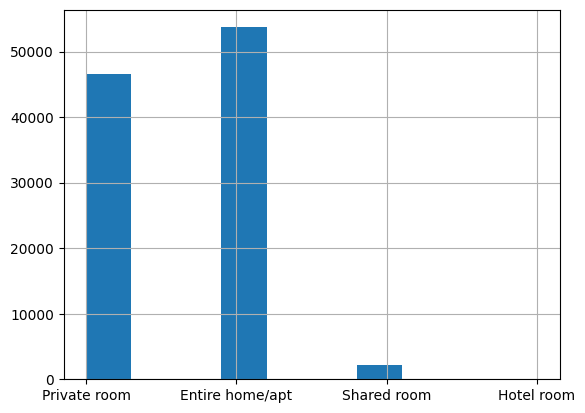

In [5]:
# Example: distribution of room_type

show_distribution(data, "room type")

In [6]:
# Write another function that outputs the distribution of the attributes, and counts the frequencies of the different values. 

def show_frequencies (data : dict, column : Union[int, str]):
    column = return_column_name(column_names, column, True)
    
    print(data[column].value_counts())

In [7]:
# This will show all the frequencies of all attributes
[show_frequencies(data, column_name) for column_name in column_names.values()]


  Used column 'id'
6044940     2
6067584     2
6077525     2
6076973     2
6076421     2
           ..
19804390    1
19803837    1
19803285    1
19802733    1
57367417    1
Name: id, Length: 102058, dtype: int64

  Used column 'NAME'
Home away from home                               33
Hillside Hotel                                    30
Water View King Bed Hotel Room                    30
New york Multi-unit building                      27
Brooklyn Apartment                                27
                                                  ..
♂ ♀ Sunny Bedroom in Popular Brooklyn              1
♂ ♀ Large Room Close to Express Subway + Bus       1
Clean room in Soho/Nolita                          1
♂ ♀ Large Sunny Bedroom Walk to Express Subway     1
Parisian Style Apartment in Heart of Brooklyn      1
Name: NAME, Length: 61281, dtype: int64

  Used column 'host id'
38729751923    2
3895711649     2
43698780331    2
83121548580    2
95831271296    2
              ..
18961598806    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

(e) Description dataset

- Data is provided in a csv format
- Dataset contians: id, Name, host id, host_identity_verified, host name, neighbourhood group, neighbourhood, lat, long, 
country, country code, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, 
minimum nights, number of reviews, last review, reviews per month, review rate number, calculated host listings count, 
availability 365, house_rules and license
- Thus, there are **26** attributes and each column contains **102599** rows. In total **2667574** rows.

(f)
- Function on the missing values of the selected attribute
- Test on the attribute 'id'
- Function finds missing values per entry
- Test on entry 0
- Dataframe on attribute and missing values
- Analyzation on the missing values at attributes

In [8]:
# Finds missing values in attribute
from typing import TypeVar
PandasDataFrame = TypeVar('pandas.core.frame.DataFrame')

def count_missing_values (data : dict, attribute : Union[int, str], show : bool = True) -> int:
    column = return_column_name(column_names, attribute, show)
    
    missing : int = data[column].size - data[column].dropna().size
    
    if (show):
        print("{} missing values".format(missing))
    return missing

In [9]:
count_missing_values(data, "id")


  Used column 'id'
0 missing values


0

In [10]:
# Finds missing values in row

def count_missing_values_entry (data : int, entry : int, show : bool = True) -> int:
    missing : int = data.iloc[entry].size - data.iloc[entry].dropna().size
    
    if (show):
        print("{} missing values".format(missing))
    return missing

In [11]:
count_missing_values_entry(data, 0)

1 missing values


1

In [12]:
missing_values : dict = {}

[add_to_dict(missing_values, column_name, count_missing_values(data, column_name, False))for column_name in column_names.values()]

missing_values

{'id': 0,
 'NAME': 250,
 'host id': 0,
 'host_identity_verified': 289,
 'host name': 406,
 'neighbourhood group': 29,
 'neighbourhood': 16,
 'lat': 8,
 'long': 8,
 'country': 532,
 'country code': 131,
 'instant_bookable': 105,
 'cancellation_policy': 76,
 'room type': 0,
 'Construction year': 214,
 'price': 247,
 'service fee': 273,
 'minimum nights': 409,
 'number of reviews': 183,
 'last review': 15893,
 'reviews per month': 15879,
 'review rate number': 326,
 'calculated host listings count': 319,
 'availability 365': 448,
 'house_rules': 52131,
 'license': 102597}

Analyzation on attributes. The following mentioned attributes have values missing and are according to me important

- **host_identity_verified** is crucial to quarantee the quality and safety of the customer
- **country** is crucial to know where the accomodation is. After all, airbnb is a organization that offers renting and booking at inviduals, hotels and renters. 
- **price** and **service fee** are crucial to precisely know what the costumer would be spending by staying there
- **review rate number** is crucial to know which accomodation is worth the customer's money
- **availability** is crucial for airbnb and customer to be able to plan in the various dates the customer might want to book or rent the place
- **house rules** is crucial to know what and what not to do in house. Maybe there are no house rules, but it might have been accidentally ommitted by the individual, hotel or renters.

### Cleaning data
- Clean nan from subsets
- Price from "$ 14234" to 14234

In [13]:
data = data.replace("NaN", np.nan)
data = data.replace("nan", np.nan)

data = data.dropna(subset=["price", "review rate number", "room type", "neighbourhood group"])

In [14]:
def cleaning_price(price : str) -> int:
    return int(str(price).translate({ord('$'): None, ord(","): None}))

data["price"] = data["price"].apply(lambda x: cleaning_price(x))
#data["price"] = pd.to_numeric(data["price"])

### Map code
-

In [15]:
import plotly.express as px
import plotly.graph_objects as go

import pandas as pd
import json
import numpy as np

from dash import dcc

import json

from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output, State
from dash import dcc, html, Dash, ctx
import plotly.express as px
import pandas as pd

import dash

import plotly.express as px
import numpy as np
import base64, io

from dash_iconify import DashIconify

import time
nyc = json.load(open("Data/map.geojson"))

In [16]:
{"neighbourhood group": list(data["neighbourhood group"].unique())}

{'neighbourhood group': ['Brooklyn',
  'Manhattan',
  'brookln',
  'manhatan',
  'Queens',
  'Staten Island',
  'Bronx']}

In [17]:
# Code to make map figure

def map_figure(clustering_key: str, filtered_data=data):
    # Plot the points on map with right clustering
    fig = px.scatter_mapbox(filtered_data, lat="lat", lon="long", color=filtered_data[clustering_key], custom_data={})
    #fig = px.density_mapbox(filtered_data, lat="lat", lon="long", radius=5, custom_data={   })

    # Selected points get highlighted yellow
    for scatter in fig.data:
        scatter.marker.size = 5
        scatter.selected = {"marker": {"color": "yellow"}}
        
    # The map code
    nyc = json.load(open("Data/map.geojson"))
    test = json.load(open("Data/test.geojson"))

    features = {}
    for feature in nyc["features"]:
        neighbourhood = feature["properties"]["boro_name"]

        if neighbourhood not in features:
            features[neighbourhood] = list([neighbourhood])
        features[neighbourhood].append(feature)

    layers = list()
    for scatter in fig.data:
        neighbourhood = scatter.name

        if neighbourhood in features:
            layer = {}
            layer["source"] = {"type": "FeatureCollection", "features": features[neighbourhood]}
            layer["color"] = str(scatter.marker.color)
            layer["opacity"] = 0.15 
            layer["type"] = "fill"
            layer["below"] = "traces"

            layers.append(layer)

    fig.update_layout(mapbox = {"style": "carto-positron", "zoom": 10, "center": {"lon": -73.96276, "lat": 40.68152}, "layers": layers })
    fig.update_layout(height=1000)

    return fig

In [18]:
def tree_map(clustering_key, highlight=[], filtered_data=data):
    fig = px.treemap(filtered_data, path=[px.Constant("all"), "neighbourhood group", "review rate number"], color=clustering_key)
    fig.data[0]["sort"] = False
    fig.data[0]["textinfo"] = "percent root+percent parent"
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

    return fig

#tree_map("review rate number")


In [19]:
def violin_plot(clustering_key, highlight, filtered_data=data):
    fig = px.violin(filtered_data, x="price", facet_row="Construction year", color=highlight)
    fig.update_layout(height=1000)
    return fig

In [20]:
def main_menu(input_name, button_names, visualizations, className="menu-option", state_name="main-menu", images=[]):
    children : list = [0] * (len(button_names) + 1)

    ids = ["main-menu-{}".format(name) for name in button_names]
    id_visualization_dict = {id: visualization for id, visualization in zip(ids, visualizations)}
    inputs = [Input(id, "n_clicks") for id in list(id_visualization_dict.keys())]

    for index, name in enumerate(button_names):
        children[index] = html.Button([html.Label(name), html.Img()], className=className, id=ids[index])

    store_id = "{}-local".format(state_name)
    children[-1] = dcc.Store(id=store_id, storage_type="local")

    menu = html.Div(children, id="menu-container")

    # def get_selected_fig(*args):
    #     return id_visualization_dict[ctx.triggered["prop_id"]](args)

    data_state_input = {input_name: [State(store_id, "data"), Input(store_id, "modified_timestamp")]}

    def data_callback(app):
        @app.callback(
            Output(store_id, "data"),
            inputs
        )
        def on_click(*args):
            inputs = ctx.inputs
            for key, element in inputs.items():
                if type(element) != int:
                    inputs[key] = 0
            maximum = max(inputs, key=inputs.get)
            id_selected = maximum.replace(".n_clicks", "")
            return id_selected

    return menu, data_state_input, id_visualization_dict, data_callback

In [21]:
def custom_range_slider(input_name: str, attributes, step):
    range_sliders = []
    for index, variable in enumerate(attributes):
        marks = {}
        value = []
        min : any = 0
        max : any = 1
        
        dff = data[variable]
        min = dff.min()
        max = dff.max()
        #marks = {int(number): str(int(number)) for number in dff.unique()}
        range_sliders.append(dcc.RangeSlider(id="range-slider-{}".format(variable), step=step[index], min=min, max=max, marks=marks, value=[min, max]))
    
    inputs = {input_name: [Input("range-slider-{}".format(variable), "value") for variable in attributes]}
    
    def conditions_func(args : list[list]):
        queries = []

        # The nested list is always length of 2: [min, max]
        for values, key in zip(args, attributes):
            queries.append("(({} >= {}) & ({} <= {}))".format("`{}`".format(key), values[0], "`{}`".format(key), values[1]))

        return queries
    
    return range_sliders, inputs, conditions_func

In [22]:
children_filtering_range_sliders, inputs_filtering_range_sliders, conditions_filtering_range_sliders = custom_range_slider(
    "parameters_filtering_range_sliders", 
    ["price", "review rate number"], 
    [50, 0.1])


In [23]:
def multi_variate_dropdown(input_name: str, attributes: list) -> list:
    dropdowns = []

    for attribute in attributes:
        unique = data[attribute].dropna().unique()
        if len(list(unique)) < 30:
            dropdowns.append(dcc.Dropdown(unique, unique, id="dropdown-{}".format(attribute), multi=True))

    inputs = {input_name: [Input("dropdown-{}".format(variable), "value") for variable in attributes]}

    def conditions_func(args: list[list]):
        queries = []
        for values, key in zip(args, attributes):
            if len(values) == 0:
                continue

            if type(values[0]) == str:
                queries.append(' | '.join(['{} == {}'.format('`{}`'.format(key), '"{}"'.format(v)) for v in values]))
            else:
                queries.append(' | '.join(['{} == {}'.format("`{}`".format(key), v) for v in values]))

        for index, _ in enumerate(queries):
            queries[index] = "({})".format(_)

        return queries

    
    return dropdowns, inputs, conditions_func

In [24]:
def b64image(vals=np.random.randint(1, 25, 5)):
    fig = px.bar(
        pd.DataFrame({"y": vals}).pipe(
            lambda d: d.assign(category=d.index.astype(str))
        ),
        y="y",
        color="category",
    ).update_layout(
        showlegend=False,
        xaxis_visible=False,
        yaxis_visible=False,
        bargap=0,
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
        autosize=False,
        height=100,
        width=100,
        paper_bgcolor="rgba(0,0,0,0)",
        plot_bgcolor="rgba(0,0,0,0)",
    )

    b = io.BytesIO(fig.to_image(format="png"))
    b64 = base64.b64encode(b.getvalue())
    return "data:image/png;base64," + b64.decode("utf-8"), fig

In [25]:
def get_selected_data_from_map(points, query, **args):
    if points is not None:
        dff = data.query(query)
        right_bottom = points["range"]["mapbox"][0]
        left_top = points["range"]["mapbox"][1]

        data_bool = (dff["long"] > right_bottom[0]) & (dff["lat"] < right_bottom[1]) & (dff["long"] < left_top[0]) & (dff["lat"] > left_top[1])

        if args.get("return_bool", False):
            return data_bool
        return dff[data_bool]
    return None

In [26]:
app = JupyterDash(__name__)

initial_clustering = "neighbourhood group"

children_filtering_dropdown, inputs_filtering_dropdown_map, conditions_filtering_dropdown_func = multi_variate_dropdown("parameters_filtering_dropdown", ["neighbourhood group", "room type", "Construction year"])
children_menu, state_menu, links, state_callback_function = main_menu("parameters_menu", ["Tree map", "Violin plot"], [tree_map, violin_plot])

app.layout = html.Div([
    html.Div([
        html.Div([
            html.Button([html.I(className="open fa-solid fa-bars-staggered fa-2xl"), html.I(className="close fa-solid fa-xmark fa-2xl")], id='menu-button', n_clicks=0, className="menu-button"),
        ], id="menu-button-container"),
        
        html.Div(
        [
            html.Div([
                html.Button(html.I(className="fa-solid fa-arrow-down-wide-short"), id='filter-button', n_clicks=0, className="option-button"),
                html.Button(html.I(className="fa-solid fa-rotate-right"), id='reset-button', n_clicks=0, className="option-button"),
                html.Div([
                    html.Label(["Cluster on:"], style={"font-weight": "bold"}),
                    dcc.Dropdown(
                        data.columns,
                        initial_clustering,
                        id="clustering-key"
                    ),

                    html.Label(["Filter with attributes"], style={"font-weight": "bold"}),
                    html.Div(children_filtering_dropdown, id="dropdowns-map"),
                    html.Div(children_filtering_range_sliders, id="range-sliders-map"),
                ], id="filter-container"),
            ], id="options-container", **{"data-filter-toggle": "in"}),

            html.Div([
                dcc.Loading(
                    id="map-loading",
                    children=[            
                        dcc.Graph(
                        id="map"
                        #figure=map_figure(initial_clustering)
                    )],
                    type="circle"
                )
            ])
        ], style={"width": "49%", "float": "left"}),

        html.Div([
            dcc.Loading(
                id="scatter-loading",
                children=[            
                    dcc.Graph(
                    id="scatter"
                    #figure=violin_plot(initial_clustering, None)
                    )
                ],
                type="circle"
            )
        ], style={"width": "49%", "height": "100%", "float": "right", "display": "inline-block"}),
    ],id="visualization-container"),

    # html.Div([
    #     html.Button([html.Label("Chapter 1"), html.Img()], className="menu-option"),
    #     html.Button([html.Label("Chapter 2"), html.Img()], className="menu-option"),
    #     html.Button([html.Label("Chapter 3"), html.Img()], className="menu-option"),
    #     html.Button([html.Label("Chapter 4"), html.Img()], className="menu-option"),
    #     html.Button([html.Label("Chapter 5"), html.Img()], className="menu-option"),
    # ], id="menu-container"),

    children_menu,

    html.Pre(id="selected-data", style={"z-index": 99, "position": "fixed"})
], id="visualization-menu-container", **{"data-menu-toggle": "collapsed"})

# @app.callback(
#     Output('selected-data', 'children'),
#     state_menu
# )
# def print_inputs(parameters_menu):

#     # inputs = ctx.inputs
#     # for key, element in inputs.items():
#     #     if type(element) != int:
#     #         inputs[key] = 0
#     # maximum = max(inputs, key=inputs.get)

#     # maximum = maximum.replace(".n_clicks", "")

#     # ctx_msg = json.dumps({
#     #     'states': ctx.states,
#     #     'triggered': ctx.triggered,
#     #     'inputs': ctx.inputs,
#     #     "other": inputs,
#     #     "max": maximum
#     # }, indent=2)
#     # return ctx_msg
#     return json.dumps(parameters_menu[0], indent=2)

@app.callback(
    Output("options-container", "data-filter-toggle"),
    Input("filter-button", "n_clicks"),
    Input("options-container", "data-filter-toggle"),
    prevent_initial_call=True
)
def filter_dropdown(n_clicks, boolean):
    return "out" if boolean == "in" else "in"

@app.callback(
    Output("visualization-menu-container", "data-menu-toggle"),
    Input("menu-button", "n_clicks"),
    Input("visualization-menu-container", "data-menu-toggle"),
    prevent_initial_call=True
)
def filter_dropdown(n_clicks, boolean):
    return "appear" if boolean == "collapsed" else "collapsed"

@app.callback(
    Output("dropdowns-map", "children"),
    Output("map", "selectedData"),
    Input("reset-button", "n_clicks")
)
def reset_dropdown(n_clicks):
    return [children_filtering_dropdown, None]

@app.callback(
    Output('map', 'figure'),
    Input("clustering-key", "value"),
    #Input("map", "selectedData"),
    inputs_filtering_dropdown_map, # {key: list of inputs}
    inputs_filtering_range_sliders
)
def update_clustering(clustering_key, parameters_filtering_dropdown, parameters_filtering_range_sliders):
    query1 = ' & '.join(conditions_filtering_dropdown_func(list(parameters_filtering_dropdown.values())[0]))
    query2 = " & ".join(conditions_filtering_range_sliders(list(parameters_filtering_range_sliders.values())[0]))
    query = " & ".join(["{}".format(query1), "{}".format(query2)])

    figure = map_figure(clustering_key, data.query(query))
    time.sleep(1)
    return figure

state_callback_function(app)

@app.callback(
    Output("scatter", "figure"),
    Input("map", "selectedData"),
    Input("clustering-key", "value"),
    inputs_filtering_dropdown_map,
    inputs_filtering_range_sliders, 
    state_menu
)
def update_map_selected(points, clustering_key, parameters_filtering_dropdown, parameters_filtering_range_sliders, parameters_menu):
    query1 = ' & '.join(conditions_filtering_dropdown_func(list(parameters_filtering_dropdown.values())[0]))
    query2 = " & ".join(conditions_filtering_range_sliders(list(parameters_filtering_range_sliders.values())[0]))
    query = " & ".join(["{}".format(query1), "{}".format(query2)])
    
    dff = get_selected_data_from_map(points, query, return_bool = True)
    filtered_data = data.query(query)

    id_selected = list(parameters_menu.values())[0][0]
    return links[id_selected](clustering_key, dff, filtered_data)


In [27]:
if __name__ == '__main__':
    app.run_server(debug=True)

Dash app running on http://127.0.0.1:8050/


In [28]:
def test(lol, *args):
    values = []
    for arg in args:
        values.extend(arg)
    
    return values

test(1, [2, 3, 4], [5])


[2, 3, 4, 5]

In [29]:
queries = []

for key in multi_variate_dropdown_list:
    arg = data[key].dropna().unique()

    if type(arg[0]) == str:
        queries.append(' | '.join(['{} == {}'.format("`{}`".format(key), '"{}"'.format(v)) for v in arg]))
    else:
        queries.append(' | '.join(['{} == {}'.format("`{}`".format(key), v) for v in arg]))


query = ' & '.join(queries)
query

NameError: name 'multi_variate_dropdown_list' is not defined

In [ ]:
tree_map("room type", data)

ValueError: ('None entries cannot have not-None children', path_0                             all
neighbourhood group                nan
room type              Entire home/apt
Name: 61, dtype: object)